<span style="font-size:150%">레이어</span>

In [1]:
import torch.nn as nn

fc_layer = nn.Linear(7*7*32, 1)

conv_layer = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)

sequential_layer1 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2)
)

In [2]:
print(fc_layer)
print(conv_layer)
print(sequential_layer1)

Linear(in_features=1568, out_features=1, bias=True)
Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


<span style="font-size:150%">모델</span>

In [3]:
import torch.nn as nn

class BasicNet(nn.Module):               
  def __init__(self, output_shape=10):        
    super(BasicNet, self).__init__()        
    self.fc = nn.Linear(32*32*3, output_shape)   
  def forward(self, x):                
    out = self.fc(x)                
    return out

In [4]:
model = BasicNet()
print(model)

BasicNet(
  (fc): Linear(in_features=3072, out_features=10, bias=True)
)


In [5]:
import torch.nn as nn

class FCNet(nn.Module):                  
  def __init__(self, num_classes=10):         
    super(FCNet, self).__init__()          
    self.fc0 = nn.Linear(32*32*3, 256)       
    self.fc1 = nn.Linear(256, 128)         
    self.fc2 = nn.Linear(128, 64)          
    self.fc3 = nn.Linear(64, 32)          
    self.fc4 = nn.Linear(32, num_classes)
        
def forward(self, x):                 
    out0 = self.fc0(x)
    out1 = self.fc1(out0)
    out2 = self.fc2(out1)
    out3 = self.fc3(out2)
    out4 = self.fc4(out3)
    score = self.fc(out4) # Score
    # score = F.softmax(score)
    return score 
  
model = FCNet()
print(model)

FCNet(
  (fc0): Linear(in_features=3072, out_features=256, bias=True)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [6]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Linear model (width*height*channel of the last feature map, Number of class)
        self.fc = nn.Linear(7*7*32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        flatten = out.view(out.size(0), -1)  # Flatten
        score = self.fc(flatten) # Score
        # score = F.softmax(score) 
        return score
    
model = ConvNet()
print(model)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)


In [7]:
import torchvision.models as models
import torchvision.models.detection as detection

all_models = models.list_models()
classification_models = models.list_models(module=models)
detection_models = models.list_models(module=detection)

In [8]:
print(classification_models)

['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'googlenet', 'inception_v3', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shufflenet_v2_x2_0', 'squeezenet1_0

In [9]:
print(detection_models)

['fasterrcnn_mobilenet_v3_large_320_fpn', 'fasterrcnn_mobilenet_v3_large_fpn', 'fasterrcnn_resnet50_fpn', 'fasterrcnn_resnet50_fpn_v2', 'fcos_resnet50_fpn', 'keypointrcnn_resnet50_fpn', 'maskrcnn_resnet50_fpn', 'maskrcnn_resnet50_fpn_v2', 'retinanet_resnet50_fpn', 'retinanet_resnet50_fpn_v2', 'ssd300_vgg16', 'ssdlite320_mobilenet_v3_large']


In [10]:
# Predefined Model
import torchvision.models as models
import torch.nn as nn

model = models.resnet18(weights=None)
num_classes = 10
model.fc = nn.Linear(model.fc.in_features, num_classes)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<span style="font-size:150%">손실 함수</span>

In [11]:
import torch

criterion = nn.CrossEntropyLoss()
prediction = torch.tensor([1.2, 0.4, 0.2, 0.2])
groundTruth = torch.tensor([1.0, 0.0, 0.0, 0.0])
loss = criterion(prediction, groundTruth)
print(loss)

tensor(0.7817)


<span style="font-size:150%">옵티마이저</span>

In [12]:
import torch.nn as nn
import torch.optim as optim

model = nn.Linear(2,2, bias=False)
torch.nn.init.ones_(model.weight.data)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# output1
optimizer.zero_grad()
input = torch.tensor([1.0,4.0])
output = model(input)
loss1 = criterion(input, output)
loss1.backward()
optimizer.step()
print(output.data)
print(loss1.data)
print(model.weight.data)

#output2
optimizer.zero_grad()
output = model(input)
loss2 = criterion(input, output)
loss2.backward()
optimizer.step()
print(output.data)
print(loss2.data)
print(model.weight.data)

tensor([5., 5.])
tensor(8.5000)
tensor([[0.9600, 0.8400],
        [0.9900, 0.9600]])
tensor([4.3200, 4.8300])
tensor(5.8557)
tensor([[0.9268, 0.7072],
        [0.9817, 0.9268]])


<span style="font-size:150%">데이터셋</span>

In [13]:
from torchvision import datasets
from torchvision.transforms import ToTensor

root = './data/cifar10'

train_data = datasets.CIFAR10(
    root=root, # 불러올 데이터가 있는 path
    train=True, # train data를 불러올거면 True, test data를 불러올거면 False
    download=False, # 데이터가 존재하지 않으면 root에 해당 데이터셋을 다운로드
    transform=ToTensor() # dataset에 적용할 transform 지정
)
test_data = datasets.CIFAR10(
    root=root,
    train=False,
    download=False,
    transform=ToTensor()
)

In [14]:
# dimension order in torch : (channel, height, width)
print(train_data[0][0].shape)

torch.Size([3, 32, 32])


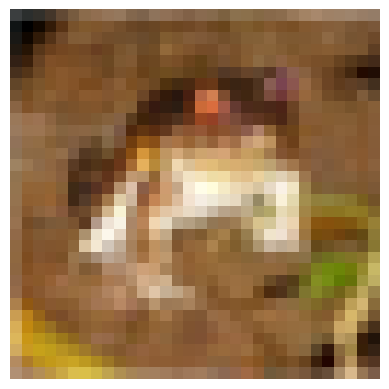

In [15]:
import matplotlib.pyplot as plt

image = train_data[0][0]
plt.imshow(image.permute(1,2,0)) # order in plt should be (height, width, channel)
plt.axis('off')
plt.show()

In [16]:
import os
import numpy as np
from torch.utils.data import Dataset
import PIL.Image as Image
import pickle

class CIFAR10(Dataset):
    base_folder = "cifar-10-batches-py"
    train_list = [
        ["data_batch_1", "c99cafc152244af753f735de768cd75f"],
        ["data_batch_2", "d4bba439e000b95fd0a9bffe97cbabec"],
        ["data_batch_3", "54ebc095f3ab1f0389bbae665268c751"],
        ["data_batch_4", "634d18415352ddfa80567beed471001a"],
        ["data_batch_5", "482c414d41f54cd18b22e5b47cb7c3cb"],
    ]
    test_list = [
        ["test_batch", "40351d587109b95175f43aff81a1287e"],
    ]
    meta = {
        "filename": "batches.meta",
        "key": "label_names",
        "md5": "5ff9c542aee3614f3951f8cda6e48888",
    }

    def __init__(self, root, train=True, transform=None,target_transform=None):
        super(CIFAR10, self).__init__()
        self.root = root
        self.train = train
        self.transform = transform
        self.target_transform = target_transform
        
        if self.train:
            downloaded_list = self.train_list
        else:
            downloaded_list = self.test_list

        self.data = []
        self.targets = []

        for file_name, _ in downloaded_list:
            file_path = os.path.join(self.root, self.base_folder, file_name)
            with open(file_path, "rb") as f:
                entry = pickle.load(f, encoding="latin1")
                self.data.append(entry["data"])
                if "labels" in entry:
                    self.targets.extend(entry["labels"])
                else:
                    self.targets.extend(entry["fine_labels"])

        self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        self.data = self.data.transpose((0, 2, 3, 1))
        self._load_meta()

    def _load_meta(self):
        path = os.path.join(self.root, self.base_folder, self.meta["filename"])
        with open(path, "rb") as infile:
            data = pickle.load(infile, encoding="latin1")
            self.classes = data[self.meta["key"]]
        self.class_to_idx = {_class: i for i, _class in enumerate(self.classes)}

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img, target = self.data[index], self.targets[index]
        img = Image.fromarray(img)
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return img, target

50000


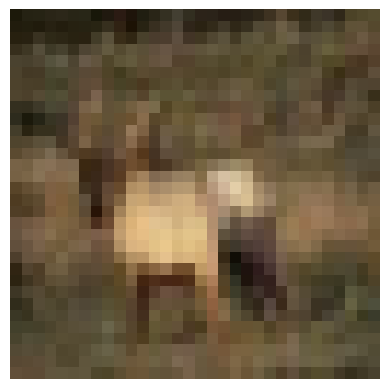

In [17]:
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

root = './data/cifar10'

train_data = CIFAR10(
    root= root,
    train=True,
    transform=ToTensor(),
)
print(len(train_data))

image = train_data[3][0]
plt.imshow(image.permute(1,2,0)) # order in plt should be (height, width, channel)
plt.axis('off')
plt.show()

<span style="font-size:150%">어그멘테이션</span>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


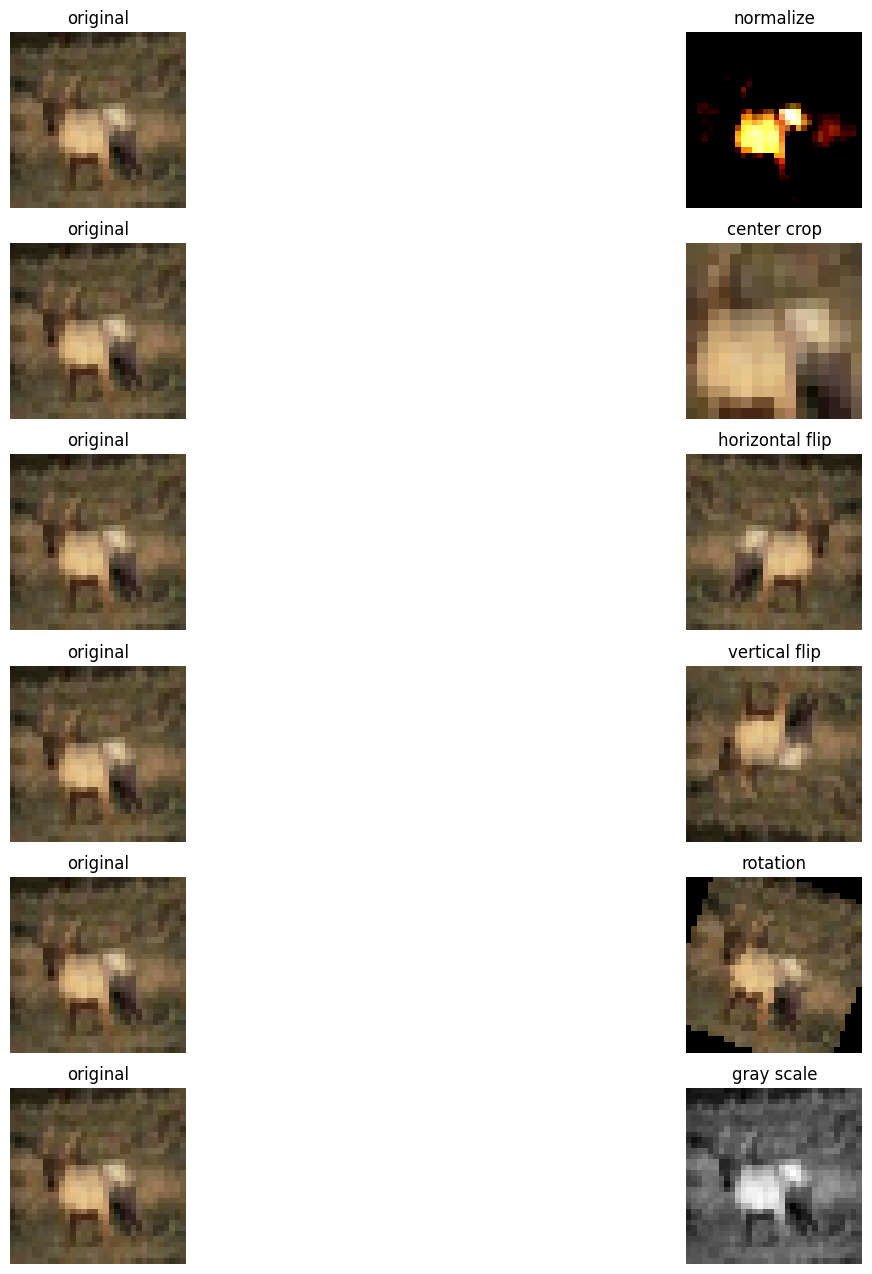

In [18]:
import torchvision.transforms as transforms

# Augmentation들 선언
normalize =transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225],
    )
center_crop = transforms.CenterCrop(16)
horizontal_flip = transforms.RandomHorizontalFlip(p=1)
vertical_flip = transforms.RandomVerticalFlip(p=1)
random_roation = transforms.RandomRotation([-45, 45])
gray_scale = transforms.Grayscale()

#이미지에 각각의 Augmentation을 적용
normalized_img = normalize(image)
center_crop_img = center_crop(image)
h_flip_img = horizontal_flip(image)
v_flip_img = vertical_flip(image)
rotate_img = random_roation(image)
gray_img = gray_scale(image)

# 적용된 Augmentation 결과들을 확인
fig = plt.figure(figsize=(16,16))

for i in range(1,12,2):
    plt.subplot(6,2,i)
    plt.imshow(image.permute(1,2,0))
    plt.title('original')
    plt.axis('off')

plt.subplot(6,2,2)
plt.imshow(normalized_img.permute(1, 2, 0))
plt.title('normalize')
plt.axis('off')

plt.subplot(6,2,4)
plt.imshow(center_crop_img.permute(1,2,0))
plt.title('center crop')
plt.axis('off')

plt.subplot(6,2,6)
plt.imshow(h_flip_img.permute(1, 2, 0))
plt.title('horizontal flip')
plt.axis('off')

plt.subplot(6,2,8)
plt.imshow(v_flip_img.permute(1, 2, 0))
plt.title('vertical flip')
plt.axis('off')

plt.subplot(6,2,10)
plt.imshow(rotate_img.permute(1, 2, 0))
plt.title('rotation')
plt.axis('off')

plt.subplot(6,2,12)
plt.imshow(gray_img.permute(1, 2, 0), cmap='gray')
plt.title('gray scale')
plt.axis('off')

plt.show()

<span style="font-size:150%">데이터로더</span>

In [19]:
from torch.utils.data import DataLoader

trainloader = DataLoader(train_data, batch_size=256, shuffle=True, num_workers=0)
testloader = DataLoader(test_data, batch_size=256, shuffle=False, num_workers=0)

In [20]:
data = next(iter(trainloader))
print(data[0].shape)

torch.Size([256, 3, 32, 32])
